In [1]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering as SC, AgglomerativeClustering as AC
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

In [2]:
def plot_silhouette(range_n_clusters,X):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

In [3]:
data=pd.read_csv('heart 2.csv')

In [4]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


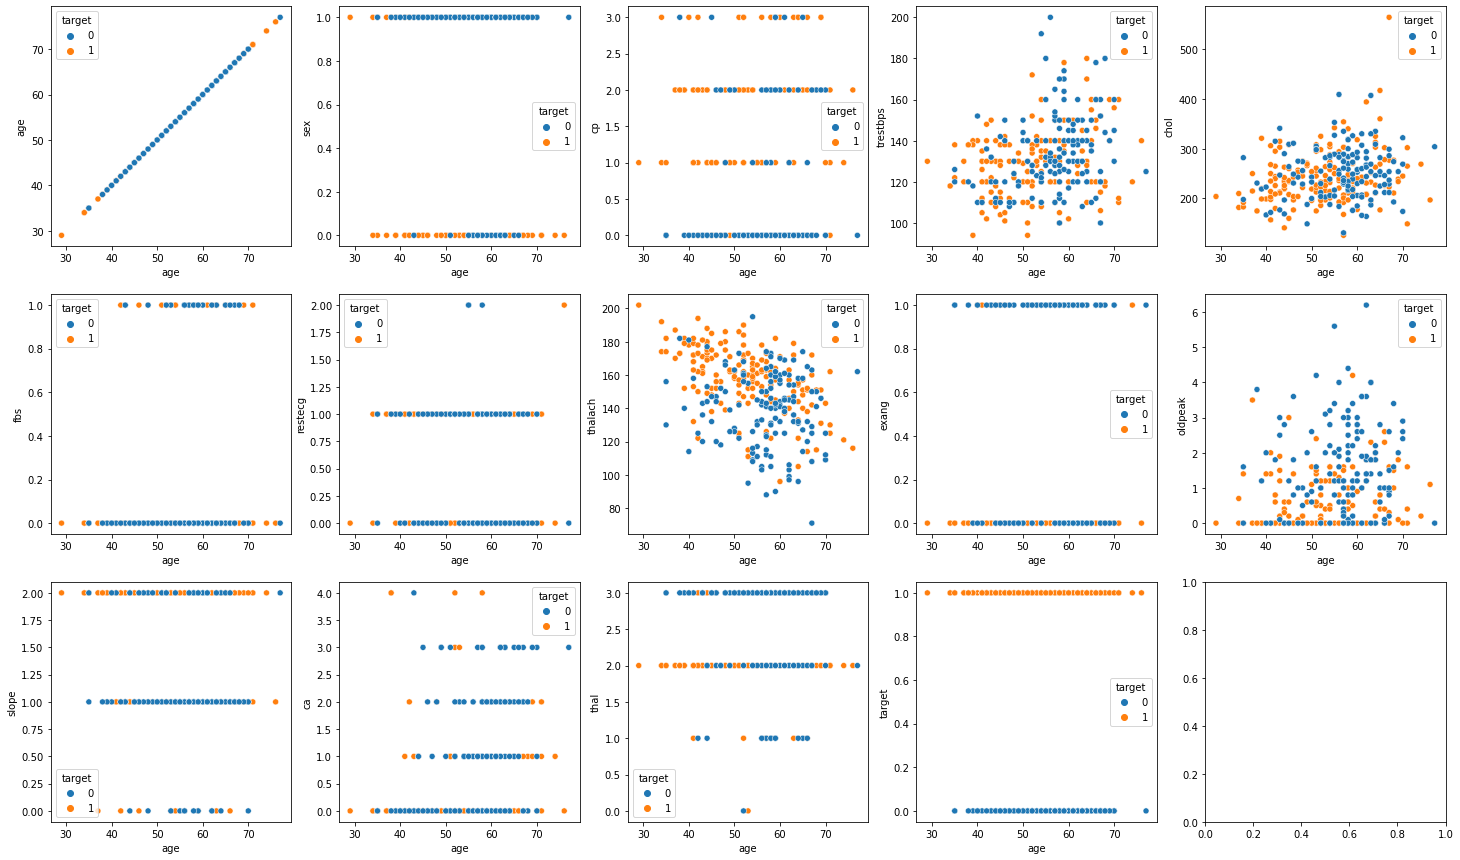

In [6]:
fig,axes=plt.subplots(nrows=3,ncols=5,figsize=(25,15))
i=0
j=0
for col in data.columns:
    sns.scatterplot(data=data, x='age',y=col, hue='target',ax=axes[i][j])
    #axes[i][j].legend()
    j+=1
    if j>4:
        i+=1
        j=0

In [7]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

# PCA

In [8]:
num_dat=data.drop(columns=['fbs','exang','sex','target'])

In [9]:
scaler=StandardScaler()
num_dat_std=scaler.fit_transform(num_dat)

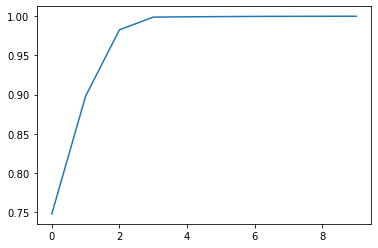

In [10]:
pca=PCA(whiten=True)
pca.fit(num_dat)
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.figure()
plt.plot(cumsum)

In [11]:
np.sum(pca.explained_variance_ratio_)

1.0

In [12]:
pca.n_components_

10

In [13]:
np.sum(pca.explained_variance_ratio_)

1.0

<AxesSubplot:>

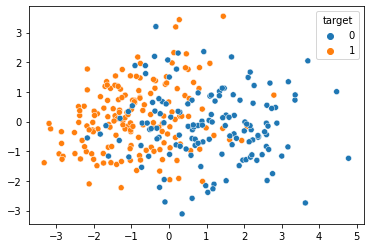

In [14]:
X2D=PCA(n_components=2).fit_transform(num_dat_std)
sns.scatterplot(x=X2D[:,0],y=X2D[:,1],hue=data.target)

## Clustering

## KMeans

In [15]:
scaler=StandardScaler()
X=scaler.fit_transform(data.drop(columns='target'))
kmeans=KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [16]:
print(kmeans.labels_)
print(kmeans.inertia_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1
 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1
 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1
 1 1 1 0 1 1 0]
3330.764806868471


### Elbow Method

Text(0, 0.5, 'Inertia')

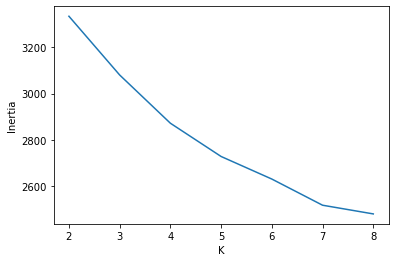

In [17]:
K=[2,3,4,5,6,7,8]
inertia=[KMeans(n_clusters=i).fit(X).inertia_ for i in K]
plt.plot(K,inertia)
plt.xlabel('K')
plt.ylabel('Inertia')

For n_clusters = 2 The average silhouette_score is : 0.1669432186964338
For n_clusters = 3 The average silhouette_score is : 0.1166022552602232
For n_clusters = 4 The average silhouette_score is : 0.11868946192965761
For n_clusters = 5 The average silhouette_score is : 0.11834441410718873
For n_clusters = 6 The average silhouette_score is : 0.11315399134369156
For n_clusters = 7 The average silhouette_score is : 0.10817972974333563
For n_clusters = 8 The average silhouette_score is : 0.10739537199666171


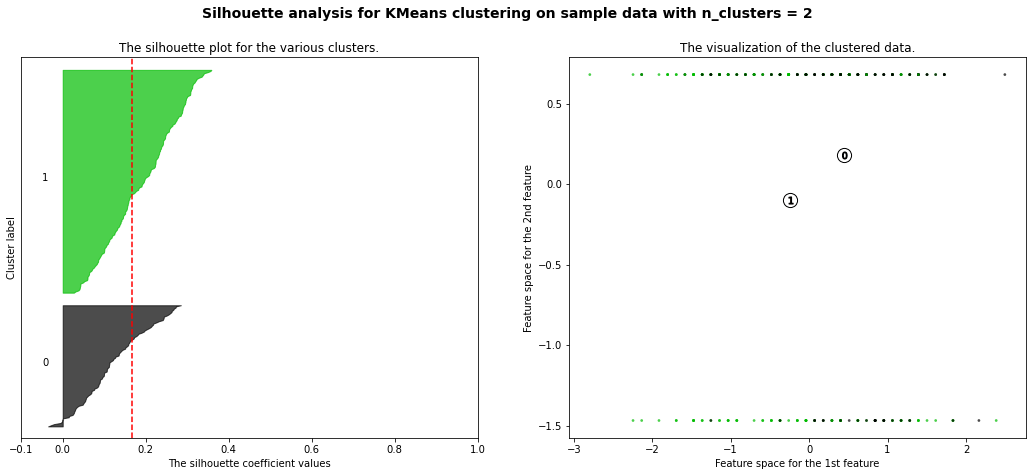

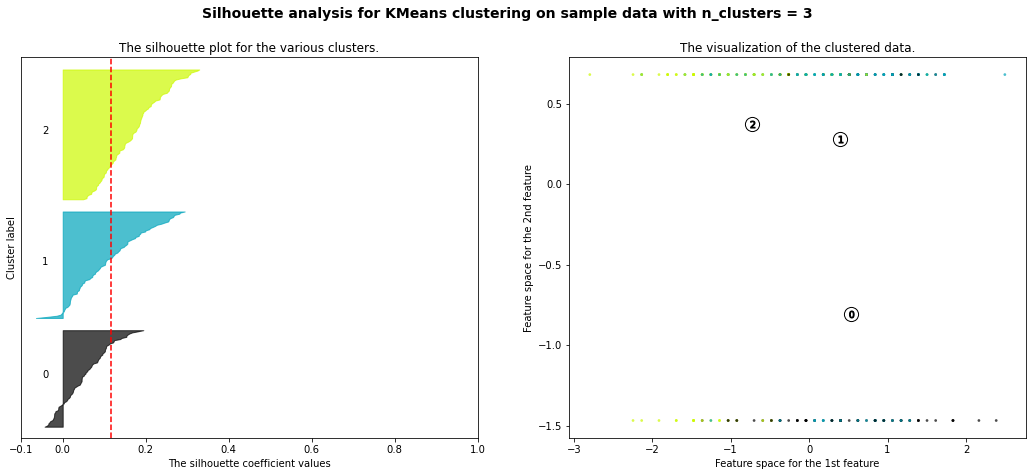

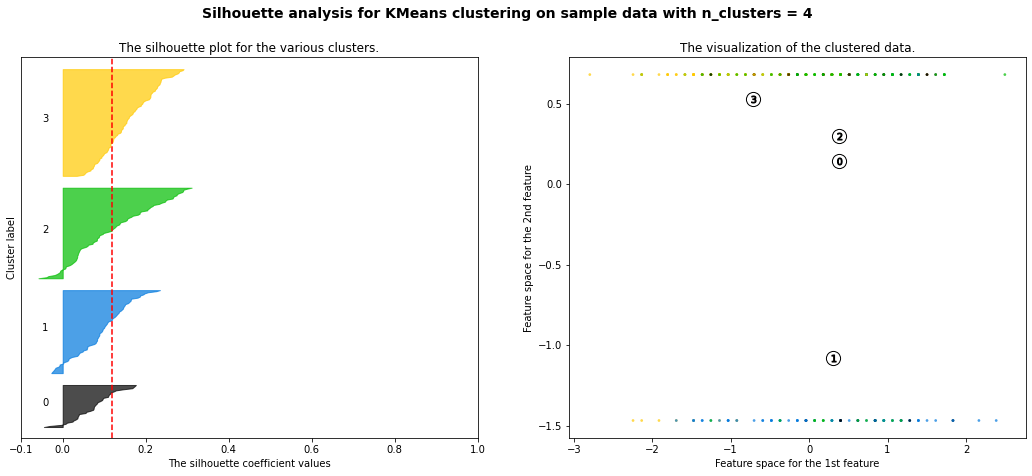

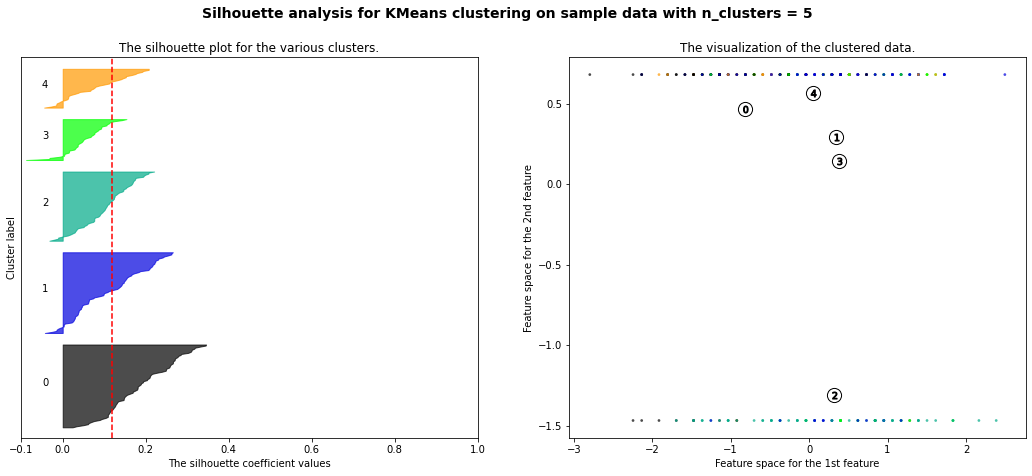

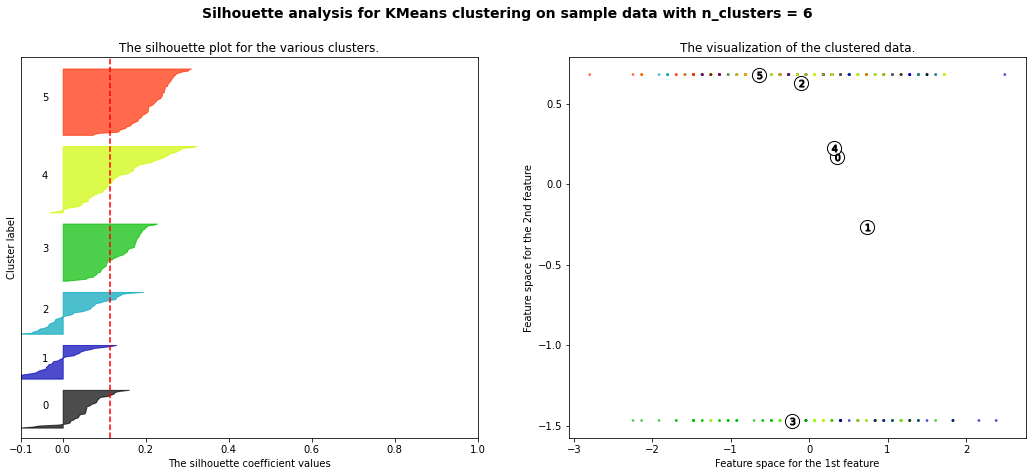

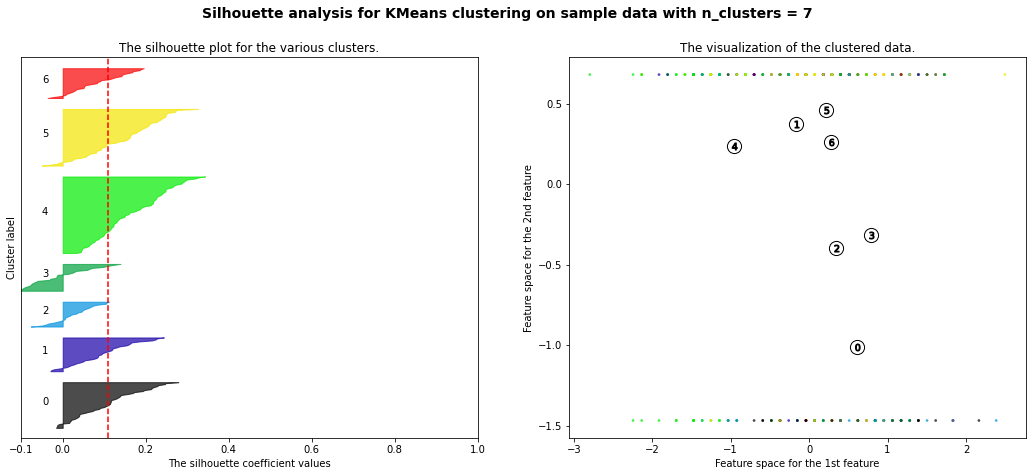

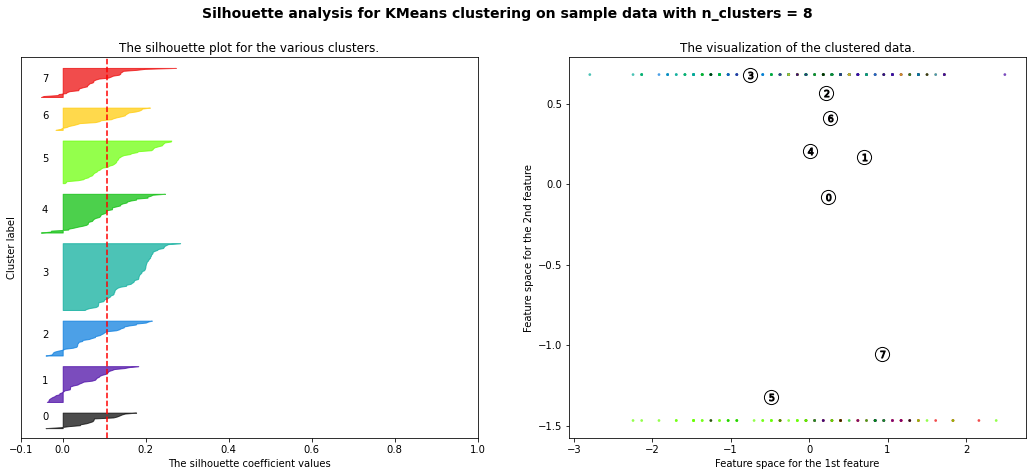

In [18]:
plot_silhouette(K,X)

Text(0, 0.5, 'Inertia')

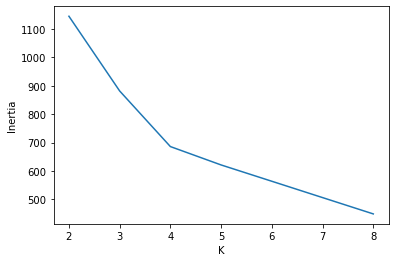

In [19]:
#Pakai PCA

scaler=StandardScaler()
X_reduced=scaler.fit_transform(np.append(X2D,data[['fbs','exang','sex']],axis=1))

K=[2,3,4,5,6,7,8]
inertia=[KMeans(n_clusters=i).fit(X_reduced).inertia_ for i in K]
plt.plot(K,inertia)
plt.xlabel('K')
plt.ylabel('Inertia')

### Silhouette Plot

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

Text(0, 0.5, 'Silhouette Score')

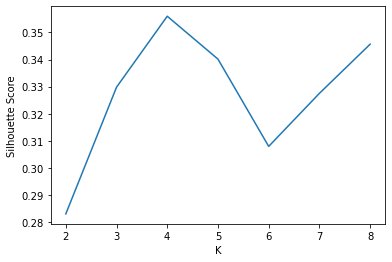

In [20]:
K=[2,3,4,5,6,7,8]
#inertia=[KMeans(n_clusters=i).fit(X2D).inertia_ for i in K]
s_score=[silhouette_score(X_reduced, KMeans(n_clusters=i).fit(X_reduced).labels_) for i in K]
plt.plot(K,s_score)
plt.xlabel('K')
plt.ylabel('Silhouette Score')

For n_clusters = 2 The average silhouette_score is : 0.2829976221353633
For n_clusters = 3 The average silhouette_score is : 0.3297870439872333
For n_clusters = 4 The average silhouette_score is : 0.35598736267694026
For n_clusters = 5 The average silhouette_score is : 0.36606716654502575
For n_clusters = 6 The average silhouette_score is : 0.2980451678386641
For n_clusters = 7 The average silhouette_score is : 0.37151894386939743
For n_clusters = 8 The average silhouette_score is : 0.35328075708121004


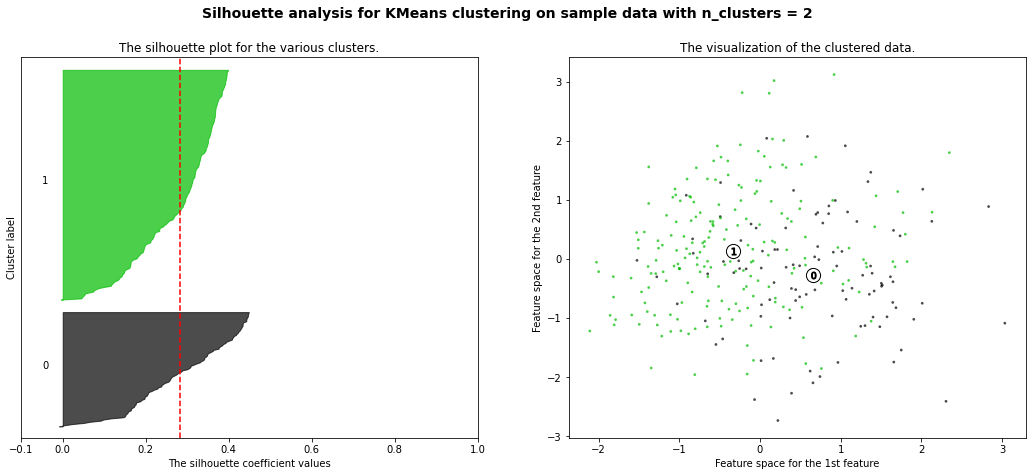

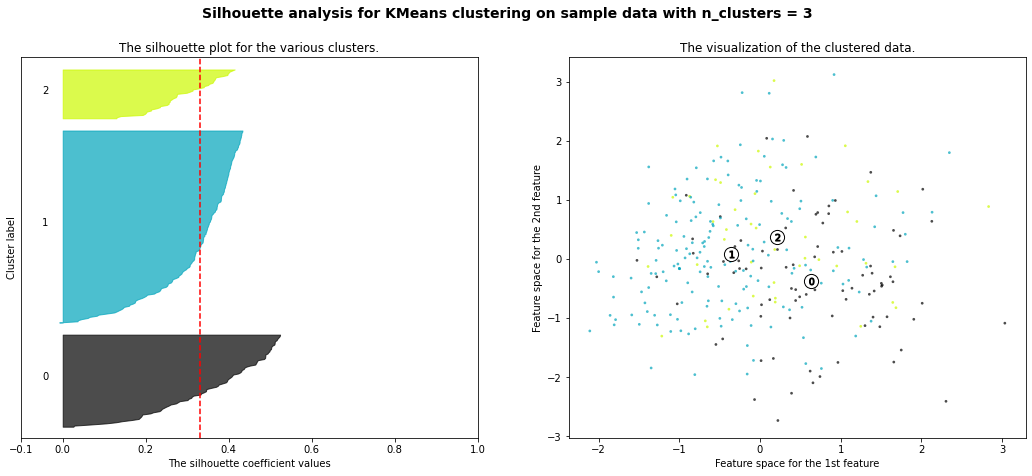

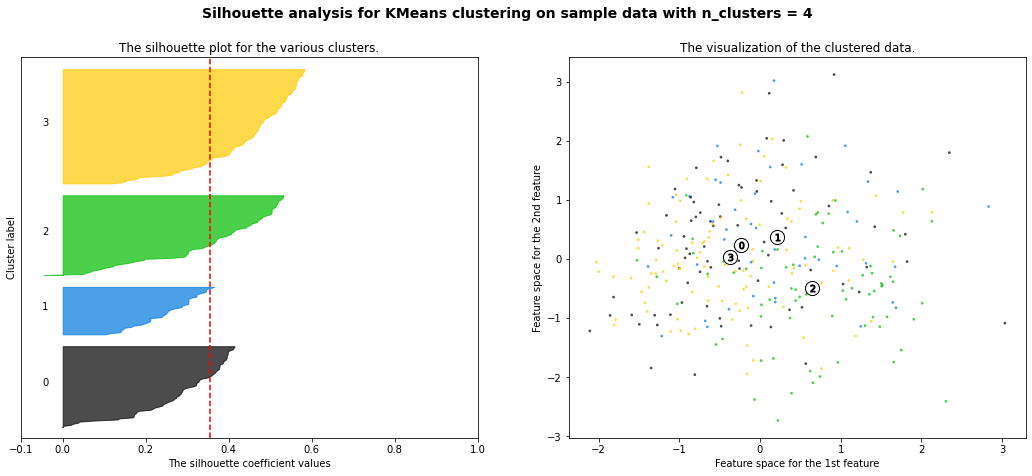

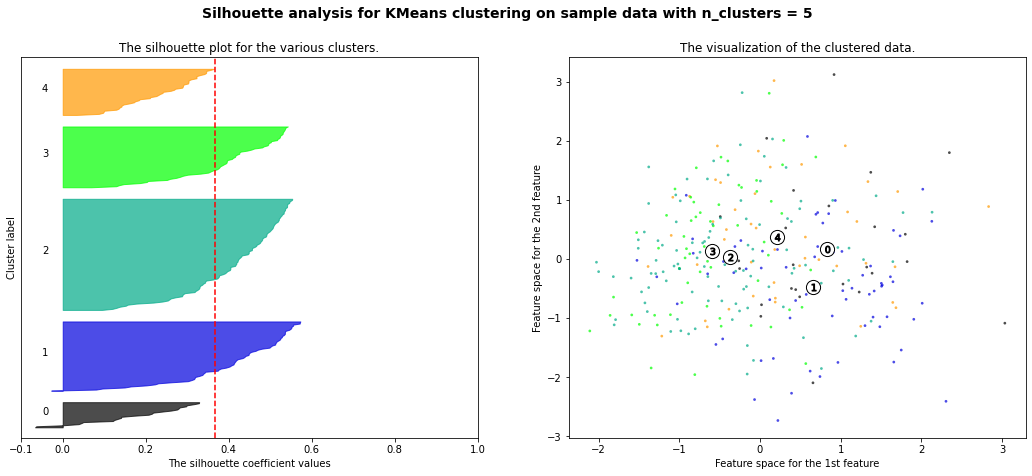

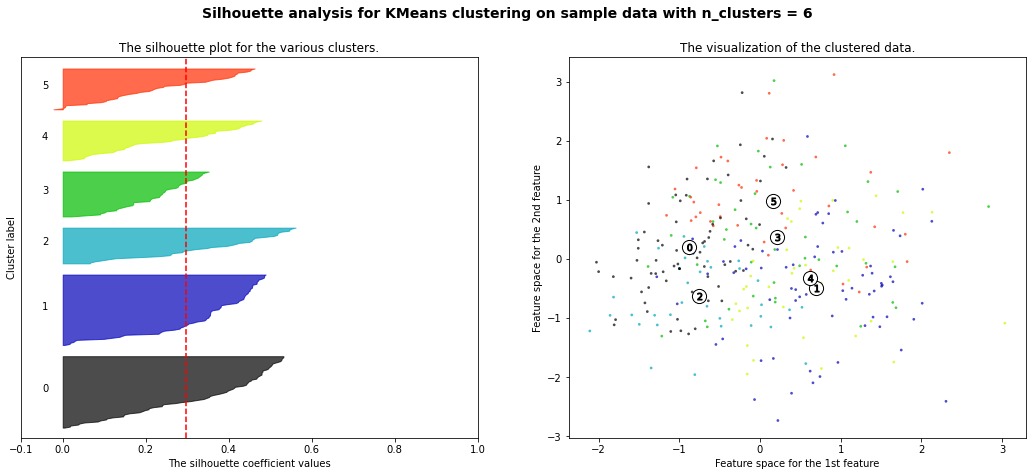

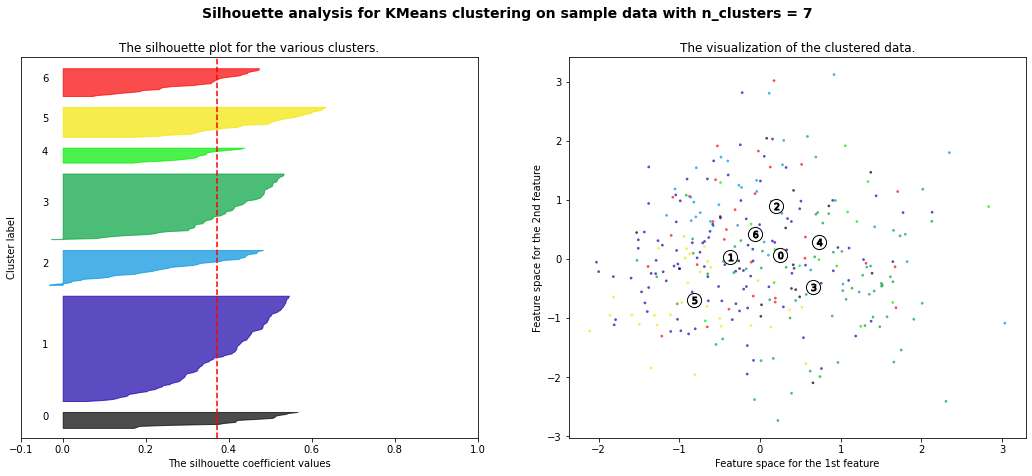

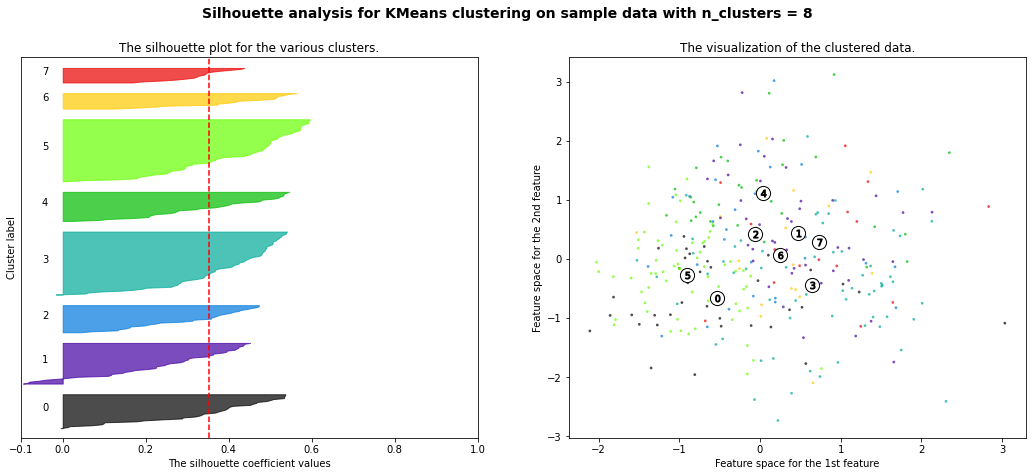

In [21]:
plot_silhouette(K,X_reduced)

## DBSCAN

In [22]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X_reduced)

DBSCAN(eps=0.05)

In [23]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

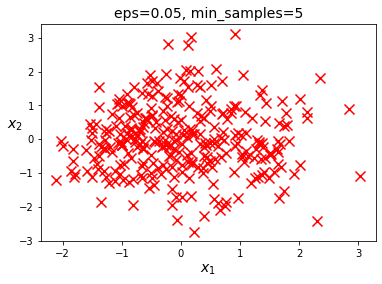

In [24]:
plot_dbscan(dbscan,X_reduced,size=100)

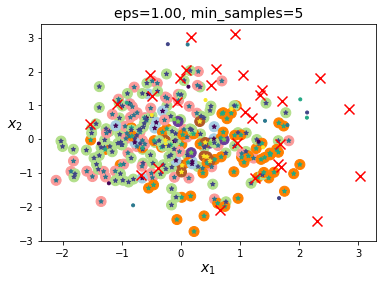

In [25]:
dbscan=DBSCAN(eps=1, min_samples=5)
dbscan.fit(X_reduced)
plot_dbscan(dbscan,X_reduced,size=100)

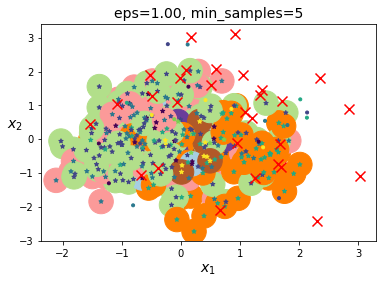

In [26]:
dbscan=DBSCAN(eps=1, min_samples=5)
dbscan.fit(X_reduced)
plot_dbscan(dbscan,X_reduced,size=600)

In [27]:
silhouette_score(X_reduced, dbscan.labels_)

0.34926270842771345

## Agglomerative Clustering

In [28]:
agg=AC(linkage="ward").fit(X_reduced)

In [29]:
agg.labels_

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,

<AxesSubplot:>

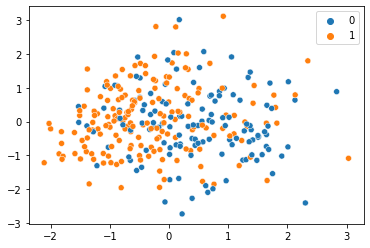

In [30]:
sns.scatterplot(x=X_reduced[:,0],y=X_reduced[:,1],hue=agg.labels_)

## Spectral Clustering

In [31]:
scl = SC(n_clusters=2, gamma=0.01)
scl.fit(X_reduced)

SpectralClustering(gamma=0.01, n_clusters=2)

In [32]:
scl.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,

<AxesSubplot:>

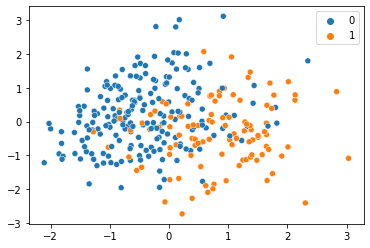

In [33]:
sns.scatterplot(x=X_reduced[:,0],y=X_reduced[:,1],hue=scl.labels_)

## Clustering for Data Preprocessing

In [174]:
import pandas as pd 
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC



scaler=StandardScaler()
scaled=scaler.fit_transform(data.drop(columns='target'))
X_train, X_test, y_train, y_test = train_test_split(scaled, data.target, test_size=0.3, random_state=42)
    
def Kmeans(n_clusters, output = 'total', X_train=X_train, X_test=X_test): 
    km = KMeans(n_clusters=n_clusters)    
    km.fit(X_train)

    X_train = pd.DataFrame(X_train)
    X_test = pd.DataFrame(X_test)

    if output == 'total':
        X_train['km'] = km.labels_
        X_test['km'] = km.predict(X_test)

    elif output == 'one':
        X_train = km.labels_.reshape(-1, 1)
        X_test = km.predict(X_test).reshape(-1, 1) 
    return X_train,X_test
    
def model(Xtrain, ytrain, Xtest, ytest, model = LogisticRegression()):
    model.fit(Xtrain, ytrain)
    predictions = model.predict(Xtest)
    return accuracy_score(ytest, predictions)

### Tanpa PCA

In [190]:
print('accuracy:',model(X_train,y_train,X_test,y_test,SVC()))

accuracy: 0.8131868131868132


In [243]:
xtr,xts=Kmeans(20,output='total')
print('accuracy:',model(xtr,y_train,xts, y_test,SVC(C=1,kernel='poly',degree=3)))

accuracy: 0.8571428571428571


### Dengan PCA

In [254]:
scaler=StandardScaler()
std_X_reduced=scaler.fit_transform(X_reduced)
X_train, X_test, y_train, y_test = train_test_split(std_X_reduced, data.target, test_size=0.3, random_state=42)
print('accuracy:',model(X_train,y_train,X_test,y_test,SVC()))

accuracy: 0.7802197802197802


In [255]:
xtr,xts=Kmeans(3,output='total')
print('accuracy:',model(xtr,y_train,xts, y_test,SVC()))

accuracy: 0.8351648351648352


## Semi-Supervised

In [224]:
from sklearn.model_selection import train_test_split
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X_reduced, data.target, train_size=0.30, random_state=42)

/Users/fahmimn21/miniforge3/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


<AxesSubplot:>

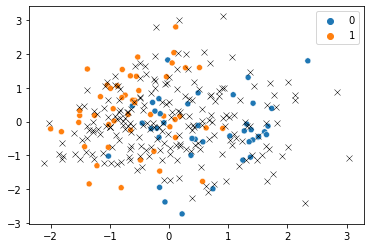

In [226]:
sns.scatterplot(x=X_labeled[:,0],y=X_labeled[:,1],hue=y_labeled)
sns.scatterplot(x=X_unlabeled[:,0],y=X_unlabeled[:,1],marker='x',color='black')

<AxesSubplot:>

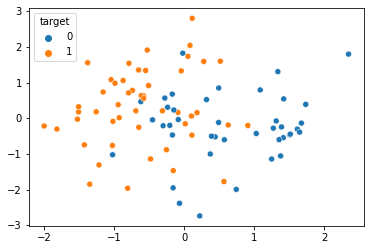

In [232]:
sns.scatterplot(x=X_labeled[:,0],y=X_labeled[:,1],hue=y_labeled)

<AxesSubplot:>

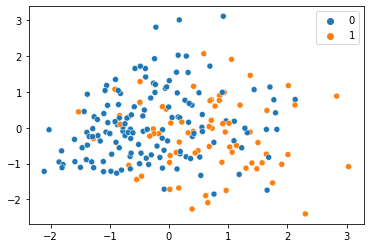

In [259]:
kmeans=KMeans(n_clusters=2).fit(X_unlabeled)
prediction=kmeans.labels_
sns.scatterplot(x=X_unlabeled[:,0],y=X_unlabeled[:,1],hue=prediction)

## Gaussian Mixture

In [213]:
from sklearn.mixture import GaussianMixture
gm=GaussianMixture(n_components=2,covariance_type='tied').fit(X_reduced)

In [41]:
gm.means_

array([[-0.28737369,  0.1165812 , -0.01787913, -0.69663055, -0.09868734],
       [ 0.59216396, -0.24022793,  0.03684183,  1.43548113,  0.20335573]])

In [214]:
labels=gm.predict(X_reduced)
labels

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,

<AxesSubplot:>

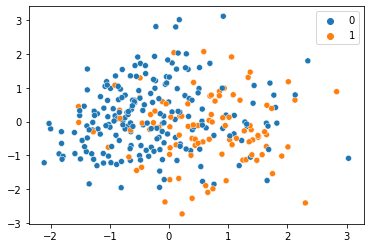

In [211]:
#Gaussian Mixture
sns.scatterplot(x=X_reduced[:,0],y=X_reduced[:,1],hue=labels)

<AxesSubplot:>

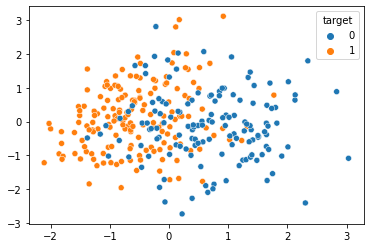

In [53]:
#Real Data
sns.scatterplot(x=X_reduced[:,0],y=X_reduced[:,1],hue=data.target)

In [54]:
gm.converged_

True

In [55]:
gm.n_iter_

3

In [65]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    #plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)

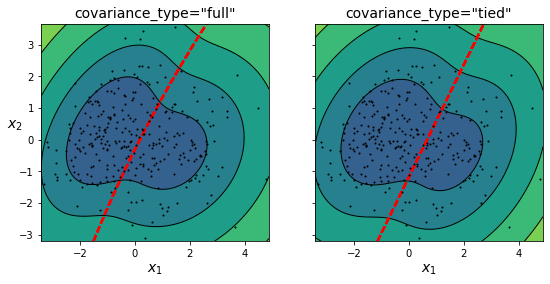

In [66]:
gm1=GaussianMixture(n_components=2,covariance_type='full').fit(X2D)
gm2=GaussianMixture(n_components=2,covariance_type='tied').fit(X2D)
compare_gaussian_mixtures(gm1,gm2,X2D)

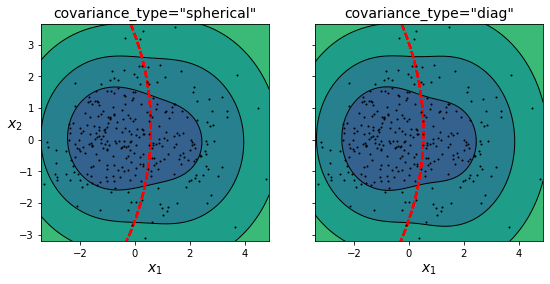

In [67]:
gm1=GaussianMixture(n_components=2,covariance_type='spherical').fit(X2D)
gm2=GaussianMixture(n_components=2,covariance_type='diag').fit(X2D)
compare_gaussian_mixtures(gm1,gm2,X2D)

### Model Selection

In [70]:
gm.aic(X_reduced)

154.31258704643494

In [71]:
gm.bic(X_reduced)

250.86963998967852

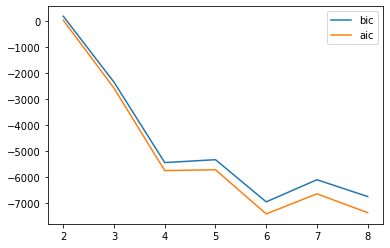

In [72]:
n_gauss=[2,3,4,5,6,7,8]
bic=[]
aic=[]
for g in n_gauss:
    gm=GaussianMixture(n_components=g,covariance_type='full').fit(X_reduced)
    bic.append(gm.bic(X_reduced))
    aic.append(gm.aic(X_reduced))

plt.plot(n_gauss,bic,label='bic')
plt.plot(n_gauss,aic,label='aic')
plt.legend()

In [316]:
gm=GaussianMixture(n_components=6,covariance_type='diag').fit(X_reduced)
print(gm.aic(X_reduced))
#gm.predict(X_reduced)

-7514.202023319744


In [261]:
gm=GaussianMixture(n_components=6,covariance_type='full').fit(X)
gm.aic(X)
print(gm.aic(X))
#gm.predict(X)

1776.2250023663466


In [264]:
gm?

## Bayesian Gaussian Mixture

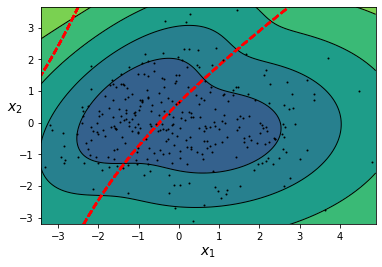

In [92]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X2D)

plot_gaussian_mixture(bgm, X2D)

<AxesSubplot:>

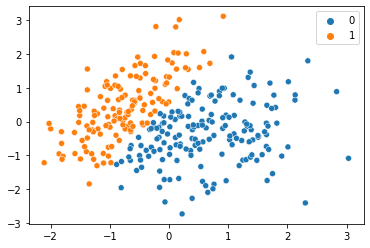

In [82]:
sns.scatterplot(x=X_reduced[:,0],y=X_reduced[:,1],hue=bgm.predict(X2D))

In [78]:
bgm.weights_

array([5.80821552e-01, 4.18852160e-01, 2.96625735e-04, 2.69659045e-05,
       2.45144587e-06, 2.22858715e-07, 2.02598832e-08, 1.84180756e-09,
       1.67437051e-10, 1.52215501e-11])

In [102]:
bgm1 = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm1.fit(X_reduced)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [104]:
bgm1.weights_

array([3.58443431e-01, 2.19204071e-01, 5.84379894e-02, 7.40105453e-02,
       3.18253288e-03, 2.14036335e-01, 2.41359018e-02, 2.84055983e-03,
       4.54655020e-02, 2.43131027e-04])

<AxesSubplot:>

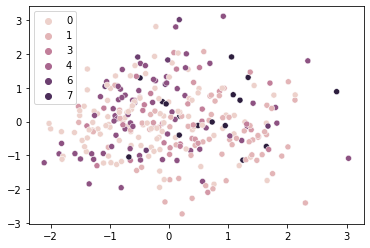

In [103]:
sns.scatterplot(x=X_reduced[:,0],y=X_reduced[:,1],hue=bgm1.predict(X_reduced))

## Anomaly Detection

/Users/fahmimn21/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

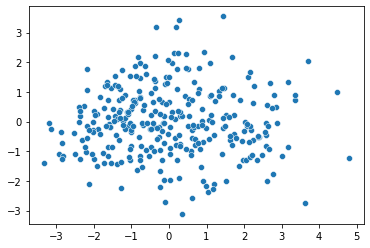

In [266]:
sns.scatterplot(X2D[:,0],X2D[:,1])

<AxesSubplot:>

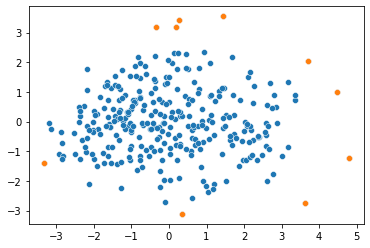

In [313]:
#GaussianMixture

gauss=GaussianMixture().fit(X2D)
scores = gauss.score_samples(X2D)
thresh = np.quantile(scores, 0.03)
index = np.where(scores <= thresh)
outliers = X2D[index]

sns.scatterplot(x=X2D[:,0],y=X2D[:,1])
sns.scatterplot(x=outliers[:,0],y=outliers[:,1])

<AxesSubplot:>

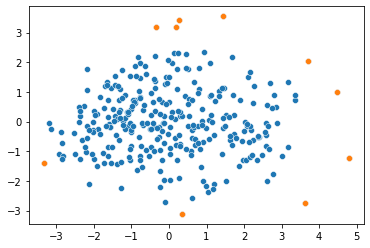

In [317]:
#BayesianGaussianMixture

bgauss=BayesianGaussianMixture().fit(X2D)
scores = bgauss.score_samples(X2D)
thresh = np.quantile(scores, 0.03)
index = np.where(scores <= thresh)
outliers = X2D[index]

sns.scatterplot(x=X2D[:,0],y=X2D[:,1])
sns.scatterplot(x=outliers[:,0],y=outliers[:,1])

## Novelty Detection

<AxesSubplot:>

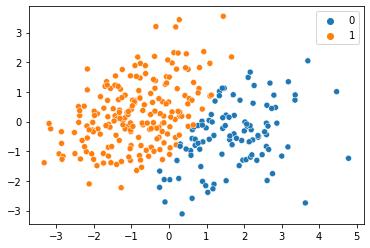

In [285]:
#Pemisahan data
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, covariance_type='tied', n_init=10, random_state=42)
bgm.fit(X2D)
label=bgm.predict(X2D)
sns.scatterplot(x=X2D[:,0],y=X2D[:,1],hue=label)

In [284]:
index=np.where(label==1)

<AxesSubplot:>

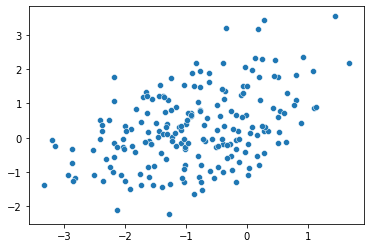

In [286]:
known_data=X2D[index]
sns.scatterplot(x=known_data[:,0],y=known_data[:,1])

In [319]:
#Asumsi data sudah bersih dari outlier
#outlier detection
gauss_novel = GaussianMixture().fit(known_data)
scores_known = gauss_novel.score_samples(known_data)
thresh_known = np.quantile(scores_known, 0.03)
#index_known = np.where(scores_known <= thresh_known)
#values_known = known_data[index_known]
#sns.scatterplot(x=known_data[:,0],y=known_data[:,1])
#sns.scatterplot(x=values_known[:,0],y=values_known[:,1])

<AxesSubplot:>

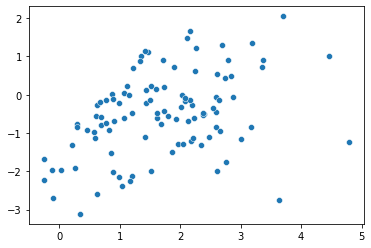

In [320]:
index=np.where(label==0)
new_data=X2D[index]
sns.scatterplot(x=new_data[:,0],y=new_data[:,1])

<AxesSubplot:>

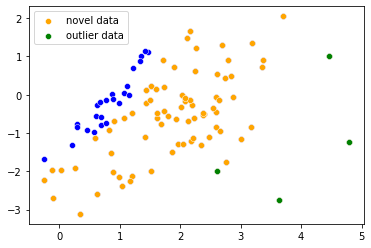

In [321]:
#prediction=gauss_novel.predict(new_data)
scores_new = gauss_novel.score_samples(new_data)

thresh_new = np.quantile(scores_new, 0.03)

index_novel = np.where(scores_new <= thresh_known)
index_out = np.where(scores_new <= thresh_new)

values_new = new_data[index_novel]
values_out = new_data[index_out]

sns.scatterplot(x=new_data[:,0],y=new_data[:,1],color='blue')
sns.scatterplot(x=values_new[:,0],y=values_new[:,1],color='orange',label='novel data')
sns.scatterplot(x=values_out[:,0],y=values_out[:,1],color='green',label='outlier data')